In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")


In [3]:
np.random.seed(420)
Countries = ["PL", "GER", "UK", "USA", "CZ", "IT"]
Product_Category = ["Electronics", "Clothing", "Food"]
data = {
    "Customer_ID" : np.arange(100000),
    "Country" : np.random.choice(Countries, 100000),
    "Product_Category" : np.random.choice(Product_Category, 100000),
    "Total_Spend" : np.random.randint(low=50, high=25000, size=(100000)),
    "Month": np.random.randint(1,13, 100000),
    "Age": np.random.randint(low=18, high=80, size=(100000)),
}
df = pd.DataFrame(data)
#data validation by increasing amount spent based on country's wealth
spend_distribution = {
    "USA": (500, 25000),
    "GER": (400, 20000),
    "UK": (300, 15000),
    "PL": (100, 8000),
    "CZ": (50, 6000),
    "IT": (200, 12000)
}
df["Total_Spend"] = df["Country"].apply(lambda x: np.random.randint(*spend_distribution[x]))
df['Customer_ID'] = df['Country'] + (df.groupby('Country').cumcount() + 1).astype(str).str.zfill(3)
df.head()

,Customer_ID,Country,Product_Category,Total_Spend,Month,Age
0,GER001,GER,Food,6314,12,44
1,PL001,PL,Electronics,6384,7,39
2,USA001,USA,Electronics,22969,10,78
3,GER002,GER,Food,13307,12,75
4,UK001,UK,Clothing,4141,7,25


In [4]:
def get_segment(amount):
    if amount < 2000:
        return "Low Spender"
    elif amount >= 2000 and amount <= 10000:
        return "Medium Spender"
    else:
        return "High Spender"

df["Segment"] = df["Total_Spend"].apply(get_segment)
df.head(1)

,Customer_ID,Country,Product_Category,Total_Spend,Month,Age,Segment
0,GER001,GER,Food,6314,12,44,Medium Spender


In [5]:
#Która grupa klientów (Segment) generuje największy przychód?

spenders_revenue = df.groupby("Segment")["Total_Spend"].sum().sort_values(ascending=False)
print(f"Top spender's segment: {spenders_revenue.idxmax()} with revenue of {spenders_revenue.max()}")

Top spender's segment: High Spender with revenue of 411776684


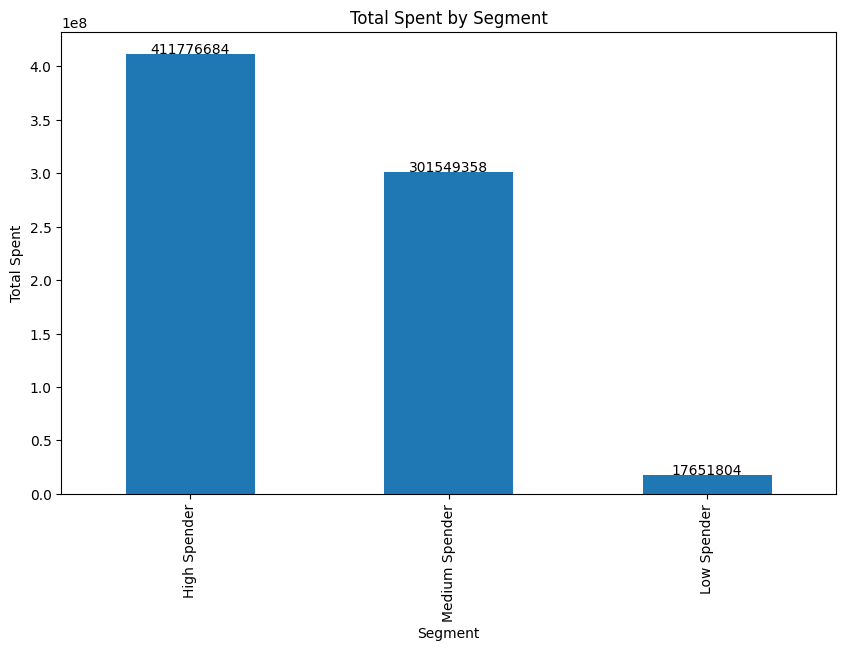

In [57]:


ax = spenders_revenue.plot(kind='bar', figsize=(10,6))
plt.ylabel("Total Spent")
plt.xlabel("Segment")
plt.title("Total Spent by Segment")

for i, v in enumerate(spenders_revenue):
    ax.text(i, v + 500, str(round(v, 2)), ha="center", fontsize=10)


In [7]:
#Jaka jest średnia wartość zamówienia (Total_Spend) w poszczególnych krajach?
spend_per_country = df.groupby("Country")["Total_Spend"].mean().sort_values(ascending=False)

for country, value in spend_per_country.items():
    print(f"In {country} avg total spend is: {value}")

In USA avg total spend is: 12738.817651956702
In GER avg total spend is: 10237.613914924297
In UK avg total spend is: 7619.4960995652955
In IT avg total spend is: 6092.40492978967
In PL avg total spend is: 4040.0845396298055
In CZ avg total spend is: 3021.311779141104


In [8]:
#Który Kraj i kategoria produktów generują największe zyski?
print(f"Country with biggest sales: {spend_per_country.idxmax()}")
biggest_rev_product = df.groupby("Product_Category")["Total_Spend"].sum().sort_values(ascending=False).idxmax()
print(f"Product category with biggest revenue: {biggest_rev_product}")


Country with biggest sales: USA
Product category with biggest revenue: Electronics


In [9]:
monthly_sales = df.groupby("Month")["Total_Spend"].sum().sort_values(ascending=False)
diff_monthly = monthly_sales.max() - monthly_sales.min()
print(f"Difference between top and lowest revenue in a month: {diff_monthly}")
pct_lowest_highest = round(monthly_sales.min() / monthly_sales.max() * 100,2)
print(f"Lowest month's revenue is: {pct_lowest_highest}% of the revenue of the best's month revenue.")
print("So, it can be said that the months are fairly equal")

Difference between top and lowest revenue in a month: 3189234
Lowest month's revenue is: 94.91% of the revenue of the best's month revenue.
So, it can be said that the months are fairly equal


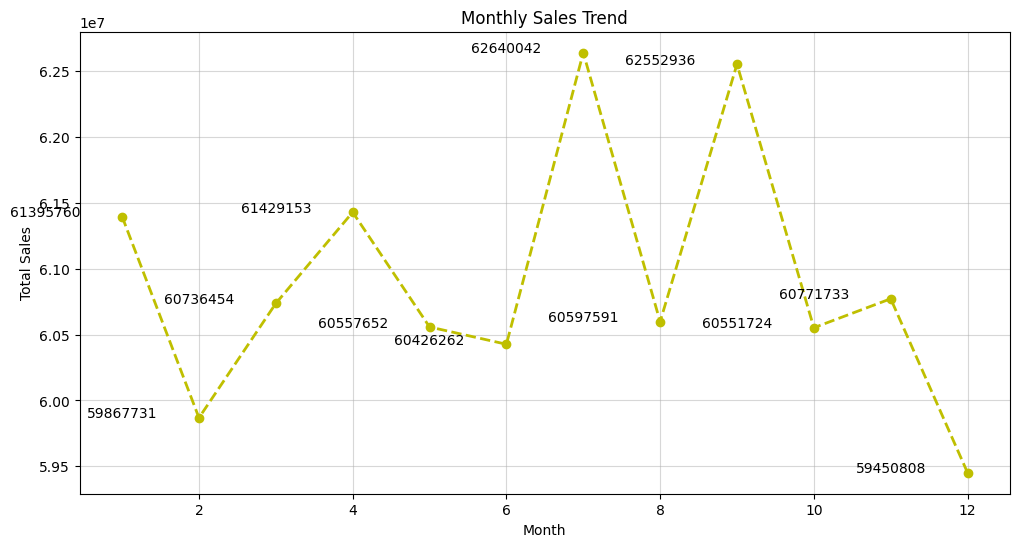

In [56]:
sales_by_month = df.groupby("Month")["Total_Spend"].sum()
plt.figure(figsize=(12,6))
ax = sales_by_month.plot(marker="o", linestyle="--", color="y", linewidth=2)
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Trend")
plt.grid(alpha=0.5)

for i, v in enumerate(sales_by_month):
    ax.text(i, v + 500, str(v), ha="center", fontsize=10)

plt.show()


In [10]:
unqiues_ages = sorted(df["Age"].unique())
youth = unqiues_ages[:len(unqiues_ages)//2]
elders = unqiues_ages[len(unqiues_ages)//2:]



In [11]:
def get_age(age):
    if age <= 48:
        return "Youth"
    else:
        return "Elder"
    
df["Generation"] = df["Age"].apply(get_age)

In [12]:
age_comparison_sales = df.groupby("Generation")["Total_Spend"].sum().sort_values(ascending=False)
print(age_comparison_sales)
print('Clearly, older half of the spenders - "Elders" - spend more money on shopping.')

Generation
Youth    367719302
Elder    363258544
Name: Total_Spend, dtype: int64
Clearly, older half of the spenders - "Elders" - spend more money on shopping.


In [13]:
sales_by_age = round(df.groupby("Age")["Total_Spend"].mean(),2)
for age, spend in sales_by_age.items():
    print(f"On avarage, people in age of {age} spent {spend} money.")

On avarage, people in age of 18 spent 7176.84 money.
On avarage, people in age of 19 spent 7398.82 money.
On avarage, people in age of 20 spent 7235.29 money.
On avarage, people in age of 21 spent 7274.79 money.
On avarage, people in age of 22 spent 7139.27 money.
On avarage, people in age of 23 spent 7356.57 money.
On avarage, people in age of 24 spent 7532.85 money.
On avarage, people in age of 25 spent 7612.69 money.
On avarage, people in age of 26 spent 7367.51 money.
On avarage, people in age of 27 spent 7116.08 money.
On avarage, people in age of 28 spent 7216.2 money.
On avarage, people in age of 29 spent 7276.7 money.
On avarage, people in age of 30 spent 7529.33 money.
On avarage, people in age of 31 spent 7241.88 money.
On avarage, people in age of 32 spent 7586.08 money.
On avarage, people in age of 33 spent 7310.34 money.
On avarage, people in age of 34 spent 7193.57 money.
On avarage, people in age of 35 spent 7441.74 money.
On avarage, people in age of 36 spent 7332.17 mo

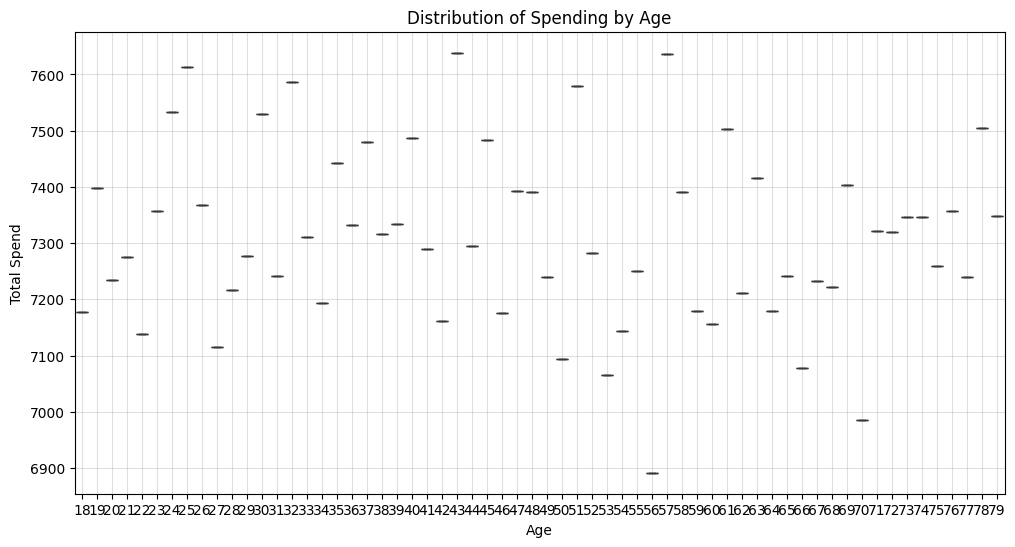

In [61]:
sales_df = sales_by_age.reset_index()
plt.figure(figsize=(12,6))
sns.boxplot(data=sales_df, x="Age", y="Total_Spend", palette="coolwarm", showfliers=False, hue="Age", legend=False)
plt.xlabel("Age")
plt.ylabel("Total Spend")
plt.title("Distribution of Spending by Age")
plt.grid(alpha=0.4)
plt.show()


In [42]:
total_sales = df["Total_Spend"].sum()
sales_by_product = df.groupby("Product_Category")["Total_Spend"].sum()

pct_product = round(sales_by_product / total_sales * 100,2)
pct_product

Product_Category
Clothing       33.20
Electronics    33.43
Food           33.37
Name: Total_Spend, dtype: float64

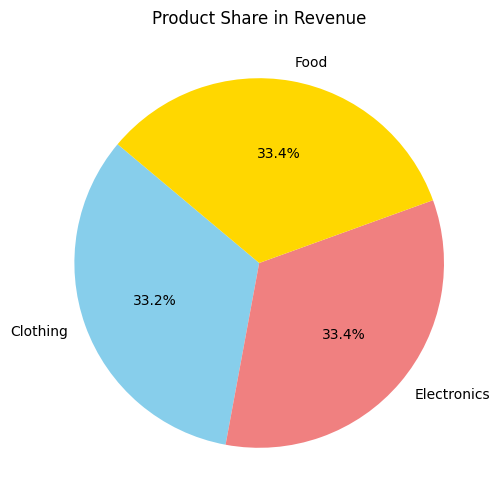

In [43]:
plt.figure(figsize=(6,6))
plt.pie(pct_product, labels=pct_product.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'gold'], startangle=140)
plt.title('Product Share in Revenue')
plt.show()